# Capstone Project - Assessing Development and Investment Potential of Tulsa Zip Codes 

First off, let's import the libraries we are going to need for this project.

In [1]:
import numpy as np
import pandas as pd
import json
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
import matplotlib.pyplot as plt
%matplotlib inline

I found some of the data online in downloadable links and saved to my drive for safekeeping. The next code cell is needed to access it.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Getting tables with zip code coordinates and other relevant information, such as population, density and average household income. These tables are both from ZIPatlas. The tables are both located at row 11 of their respective web pages. They also include unecessary columns "#" and "National Rank".

In [3]:
cdf_temp = pd.read_html('http://zipatlas.com/us/ok/tulsa/zip-code-comparison/population-density.htm', header=0)
cdf = cdf_temp[11]
cdf.drop(['#', 'National Rank'], axis=1, inplace=True)
cdf

,Zip Code,Location,City,Population,People / Sq. Mile
0,74104,"36.146447, -95.953949","Tulsa, Oklahoma",14050,5138.36
1,74129,"36.126240, -95.871215","Tulsa, Oklahoma",18542,4449.75
2,74119,"36.141847, -95.989724","Tulsa, Oklahoma",3790,4351.88
3,74136,"36.062400, -95.941457","Tulsa, Oklahoma",32712,3926.86
4,74105,"36.097300, -95.962916","Tulsa, Oklahoma",28455,3869.47
5,74114,"36.126943, -95.946695","Tulsa, Oklahoma",16913,3672.69
6,74103,"36.156061, -95.994826","Tulsa, Oklahoma",2173,3602.14
7,74135,"36.096205, -95.924016","Tulsa, Oklahoma",21320,3556.62
8,74128,"36.147180, -95.852329","Tulsa, Oklahoma",12430,3352.76
9,74112,"36.147046, -95.906335","Tulsa, Oklahoma",21222,3078.60


In [4]:
cdf1_temp = pd.read_html('http://zipatlas.com/us/ok/tulsa/zip-code-comparison/median-household-income.htm', header=0)
cdf1 = cdf1_temp[11]
cdf1.drop(['#', 'National Rank'], axis=1, inplace=True)
cdf1

,Zip Code,Location,City,Population,Avg. Income/H/hold
0,74137,"36.019270, -95.928910","Tulsa, Oklahoma",22960,"$79,049.00"
1,74132,"36.047839, -96.022897","Tulsa, Oklahoma",7269,"$51,875.00"
2,74133,"36.039272, -95.877428","Tulsa, Oklahoma",37778,"$50,379.00"
3,74114,"36.126943, -95.946695","Tulsa, Oklahoma",16913,"$47,852.00"
4,74117,"36.224147, -95.923647","Tulsa, Oklahoma",118,"$46,094.00"
5,74134,"36.110481, -95.805491","Tulsa, Oklahoma",12998,"$40,686.00"
6,74145,"36.097138, -95.890482","Tulsa, Oklahoma",18020,"$39,276.00"
7,74135,"36.096205, -95.924016","Tulsa, Oklahoma",21320,"$37,103.00"
8,74105,"36.097300, -95.962916","Tulsa, Oklahoma",28455,"$36,837.00"
9,74129,"36.126240, -95.871215","Tulsa, Oklahoma",18542,"$36,207.00"


Now it's time to merge the two tables together.

In [5]:
cdf2 = pd.merge(cdf, cdf1)
cdf2

,Zip Code,Location,City,Population,People / Sq. Mile,Avg. Income/H/hold
0,74104,"36.146447, -95.953949","Tulsa, Oklahoma",14050,5138.36,"$29,986.00"
1,74129,"36.126240, -95.871215","Tulsa, Oklahoma",18542,4449.75,"$36,207.00"
2,74119,"36.141847, -95.989724","Tulsa, Oklahoma",3790,4351.88,"$26,549.00"
3,74136,"36.062400, -95.941457","Tulsa, Oklahoma",32712,3926.86,"$34,812.00"
4,74105,"36.097300, -95.962916","Tulsa, Oklahoma",28455,3869.47,"$36,837.00"
5,74114,"36.126943, -95.946695","Tulsa, Oklahoma",16913,3672.69,"$47,852.00"
6,74103,"36.156061, -95.994826","Tulsa, Oklahoma",2173,3602.14,"$21,917.00"
7,74135,"36.096205, -95.924016","Tulsa, Oklahoma",21320,3556.62,"$37,103.00"
8,74128,"36.147180, -95.852329","Tulsa, Oklahoma",12430,3352.76,"$34,956.00"
9,74112,"36.147046, -95.906335","Tulsa, Oklahoma",21222,3078.60,"$33,728.00"


### Time to clean up this table, since it will be merged later
*   The column names are formatted to be easily understood, but as they are to be compared with other datasets, some changes for simplicity and ease of usage are in order.
*   Dropping the "city" column due to redundancy.
*   The "avg_income_household" has $ signs at the start of each value, so let's get rid of them.
*   "Location" column needs to be split into 2 separate columns, then dropped. 

In [6]:
cdf2.drop(columns=['City'], inplace=True)
cdf2.rename(columns={'Zip Code':'zip_code', 'Population':'population', 
                     'People / Sq. Mile':'people_sq_mile', 'Avg. Income/H/hold':'avg_income_household'}, inplace=True)
cdf2['latitude'], cdf2['longitude'] = cdf2['Location'].str.split(',', 1).str
cdf2 = cdf2.astype({'latitude':float, 'longitude':float})
cdf2['avg_income_household'] = cdf2['avg_income_household'].str.replace(r'\D', '')
cdf2['avg_income_household'] = cdf2['avg_income_household'].astype(float)/100.00
cdf2['avg_income_household'][0:5]
cdf2.drop(columns=['Location'], inplace=True)
cdf2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  after removing the cwd from sys.path.


,zip_code,population,people_sq_mile,avg_income_household,latitude,longitude
0,74104,14050,5138.36,29986.0,36.146447,-95.953949
1,74129,18542,4449.75,36207.0,36.126240,-95.871215
2,74119,3790,4351.88,26549.0,36.141847,-95.989724
3,74136,32712,3926.86,34812.0,36.062400,-95.941457
4,74105,28455,3869.47,36837.0,36.097300,-95.962916


### An important note to keep in mind: 

The data in the table above is **NOT** up to date, but accurate to 2010. One of the limitations of this project is a lack of updated data. With that being said, since there is a census every 10 years, a repeat of this project within the coming year (when the census data is published) could be supported by more accurate data. As such, these 3 columns (population, people_sq_mile, avg_income_household) are to be regarded as mere reference points, for a "generalized idea" of the situation today: **I am making an *assumption* that no significant changes occurred *between* the zip codes. That even though things changed, the change was proportionate to the other zip codes (i.e. what was 30, 10, 20 in 2010 could be 60, 20, 40 - but not 40, 60, 20 - today)**.  

Now it's time to take a look at another dataset, and clean it as needed.

# DATA DICTIONARY
| Column  |  Description |
|---|---|
| **Median Listing Price**  | **The median listing price within the specified geography during the specified month.**  |
| Median Listing Price M/M  | The percentage change in the median listing price from the previous month.  |
| Median Listing Price Y/Y  | The percentage change in the median listing price from the same month in the previous year.  |
| **New Listing Count**  | **The count of new listings added to the market within the specified geography. <br> The new listing count represents a typical week's worth of new listings in a given month. <br> The new listing count can be multiplied by the number of weeks in a month to produce a monthly new listing count.**  |
| New Listing Count M/M  | The percentage change in the new listing count from the previous month.  |
| New Listing Count Y/Y  | The percentage change in the new listing count from the same month in the previous year.  |
| **Price Increase Count**  | **The count of listings which have had their price increased within the specified geography.<br> The price increase count represents a typical week's worth of listings which have had their price increased in a given month.<br> The price increase count can be multiplied by the number of weeks in a month to produce a monthly price increase count.**  |
| Price Increase Count M/M  | The percentage change in the price increase count from the previous month.  |
| Price Increase Count Y/Y  | The percentage change in the price increase count from the same month in the previous year.  |
| **Price Decrease Count**  | **The count of listings which have had their price reduced within the specified geography.<br> The price decrease count represents a typical week's worth of listings which have had their price reduced in a given month.<br> The price decrease count can be multiplied by the number of weeks in a month to produce a monthly price decrease count.**  |
| Price Decrease Count  M/M  |  	The percentage change in the price decrease count from the previous month.  |
|  Price Decrease Count Y/Y | The percentage change in the price decrease count from the same month in the previous year.  |
| **Median List Price Per Sqft**  | **The median listing price per square foot within the specified geography during the specified month.**  |
| Median List Price Per Sqft M/M 	 |  The percentage change in the median listing price per square foot from the previous month.	  |
| Median List Price Per Sqft Y/Y  | The percentage change in the median listing price per square foot from the same month in the previous year.  |
| **Median Listing Sqft**  | **The median listing square feet within the specified geography during the specified month.**  |
|  Median Listing Sqft M/M 	 | The percentage change in the median listing square feet from the previous month.  |
| Median Listing Sqft Y/Y  | The percentage change in the median listing square feet from the same month in the previous year.  |
| **Avg Listing Price**  | **The average listing price within the specified geography during the specified month.**  |
| Avg Listing Price M/M  | The percentage change in the average listing price from the previous month.  |
| Avg Listing Price Y/Y  | The percentage change in the average listing price from the same month in the previous year.  |
| **Total Listing Count**  | **The total of both active listings and pending listings within the specified geography during the specified month.<br> This is a snapshot measure of how many total listings can be expected on any given day of the specified month.**  |
| Total Listing Count M/M |  	The percentage change in the total listing count from the previous month.  |
| Total Listing Count Y/Y  | The percentage change in the total listing count from the same month in the previous year.  |

In [7]:
cdf3 = pd.read_csv('/content/drive/My Drive/RDC_Inventory_Core_Metrics_Zip_History.csv')
cdf3.columns

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['month_date_yyyymm', 'postal_code', 'zip_name', 'flag',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_feet',
       'median_listing_price_per_square_feet_mm',
       'median_listing_price_per_square_feet_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'to

This dataset clearly has a lot of columns. For this project I will only need some of them, so let's drop the rest. Let's also change the name of column "postal_code" to "zip_code" since that's what it's called in the US, and to match our other dataframe.

In [8]:
cdf4 = pd.DataFrame(cdf3.drop(columns=['flag', 'active_listing_count','active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy', 'pending_ratio',
       'pending_ratio_mm', 'pending_ratio_yy']))
cdf4.rename(columns = {"postal_code":"zip_code"}, inplace=True)
cdf4.head()

,month_date_yyyymm,zip_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,median_listing_price_per_square_feet,median_listing_price_per_square_feet_mm,median_listing_price_per_square_feet_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy
0,202006,72202,"little rock, ar",220050.0,-0.0443,-0.0317,16.0,0.0000,1.0000,0.0,NaN,NaN,12.0,2.0000,0.0000,163.472379,-0.0101,-0.0869,1563.0,-0.1307,0.1392,319255.0,-0.0217,0.0814,69.0,0.0299,-0.2660
1,202006,8826,"glen gardner, nj",420000.0,0.0001,NaN,8.0,0.0000,0.0000,0.0,NaN,NaN,0.0,NaN,-1.0000,0.000000,NaN,-1.0000,0.0,NaN,-1.0000,412735.0,0.0178,0.0428,17.0,0.2143,-0.6600
2,202006,39110,"madison, ms",439500.0,0.0267,0.0986,108.0,0.0385,-0.1290,4.0,0.0,0.0,96.0,-0.0769,-0.3684,152.009996,0.0017,0.0803,3122.5,0.0082,0.0422,502673.0,0.0272,0.0519,454.0,-0.1028,-0.2570
3,202006,33315,"fort lauderdale, fl",414999.5,0.0400,0.1431,32.0,0.3333,0.1429,0.0,-1.0,NaN,36.0,0.2857,0.0000,240.743253,-0.0098,-0.0065,1325.0,0.0091,0.0392,481165.0,0.0292,0.1880,160.0,0.0256,-0.0751
4,202006,85028,"phoenix, az",559500.0,0.2031,NaN,28.0,0.7500,0.0000,0.0,-1.0,NaN,24.0,0.0000,-0.5385,238.561184,0.0230,0.0631,2238.0,0.0337,0.0380,661872.0,0.0292,0.1409,100.0,0.0989,-0.2366


Now to get only the data for Tulsa County and merge with our previous dataframe which contains the zip codes' coordinates. Since "inner" join is being used (the default option), the data is also being filtered from all of the states to just Tulsa County.

In [9]:
tulsadf = pd.merge(left=cdf4, right=cdf2, left_on='zip_code', right_on='zip_code')
print(tulsadf.shape)
tulsadf

(1024, 32)


,month_date_yyyymm,zip_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,new_listing_count,new_listing_count_mm,new_listing_count_yy,price_increased_count,price_increased_count_mm,price_increased_count_yy,price_reduced_count,price_reduced_count_mm,price_reduced_count_yy,median_listing_price_per_square_feet,median_listing_price_per_square_feet_mm,median_listing_price_per_square_feet_yy,median_square_feet,median_square_feet_mm,median_square_feet_yy,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,population,people_sq_mile,avg_income_household,latitude,longitude
0,202006,74127,"tulsa, ok",90000.0,0.0643,-0.2503,16.0,1.0000,0.0000,0.0,NaN,NaN,4.0,0.0000,-0.5,73.375529,0.0300,0.0115,1446.0,0.0263,-0.0386,126095.0,0.2605,-0.1245,44.0,0.0476,-0.2143,18108,568.27,30486.0,36.190622,-96.046563
1,202005,74127,"tulsa, ok",84560.0,0.0570,NaN,8.0,0.0000,-0.5000,0.0,NaN,NaN,4.0,0.0000,0.0,71.238095,0.0810,-0.2090,1409.0,-0.0056,-0.1504,100037.0,-0.0701,-0.5106,42.0,-0.0455,-0.1765,18108,568.27,30486.0,36.190622,-96.046563
2,202004,74127,"tulsa, ok",80000.0,0.0063,NaN,8.0,0.0000,-0.3333,0.0,NaN,NaN,4.0,-0.6667,0.0,65.901361,0.0497,-0.0865,1417.0,0.0711,-0.1299,107576.0,0.0065,-0.4382,44.0,-0.0222,-0.0222,18108,568.27,30486.0,36.190622,-96.046563
3,202003,74127,"tulsa, ok",79500.0,-0.3591,-0.4126,8.0,-0.3333,-0.3333,0.0,NaN,NaN,12.0,0.5000,0.5,62.781443,-0.1451,-0.1345,1323.0,-0.0907,-0.1690,106882.0,-0.1623,-0.4763,45.0,-0.2105,0.0227,18108,568.27,30486.0,36.190622,-96.046563
4,202002,74127,"tulsa, ok",124050.0,0.2411,0.0692,12.0,0.0000,0.0000,0.0,NaN,NaN,8.0,-0.3333,0.0,73.441247,0.0544,0.0396,1455.0,-0.0552,-0.0481,127583.0,-0.0227,-0.3076,57.0,0.0556,0.1400,18108,568.27,30486.0,36.190622,-96.046563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,201612,74146,"tulsa, ok",99950.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,68.879310,NaN,NaN,1620.5,NaN,NaN,104626.0,NaN,NaN,34.0,NaN,NaN,14380,2708.28,30570.0,36.098806,-95.855191
1020,201611,74146,"tulsa, ok",99750.0,NaN,NaN,4.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,72.046589,NaN,NaN,1252.5,NaN,NaN,101824.0,NaN,NaN,39.0,NaN,NaN,14380,2708.28,30570.0,36.098806,-95.855191
1021,201610,74146,"tulsa, ok",89950.0,NaN,NaN,8.0,NaN,NaN,0.0,NaN,NaN,4.0,NaN,NaN,70.609003,NaN,NaN,1252.0,NaN,NaN,94889.0,NaN,NaN,31.0,NaN,NaN,14380,2708.28,30570.0,36.098806,-95.855191
1022,201609,74146,"tulsa, ok",91500.0,NaN,NaN,12.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,71.428571,NaN,NaN,1321.5,NaN,NaN,92465.0,NaN,NaN,30.0,NaN,NaN,14380,2708.28,30570.0,36.098806,-95.855191


Now that we have all the data we need in our dataset, it's time to start wrangling! 
We need to:


*   Handle missing values.
*   It appears as though the "zip_name" column only contains the value "tulsa, ok". Let's make sure, and drop if it is indeed redundant.
*   The "month_date_yyyymm" column needs to become an actual datetime type, so let's format it nicely, then rename it accordingly.
*   Lastly, let's check the data types of our columns to make sure nothing is amiss.


  

In [10]:
missing_data = tulsadf.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

month_date_yyyymm
False    1024
Name: month_date_yyyymm, dtype: int64

zip_code
False    1024
Name: zip_code, dtype: int64

zip_name
False    1024
Name: zip_name, dtype: int64

median_listing_price
False    1024
Name: median_listing_price, dtype: int64

median_listing_price_mm
False    758
True     266
Name: median_listing_price_mm, dtype: int64

median_listing_price_yy
False    694
True     330
Name: median_listing_price_yy, dtype: int64

new_listing_count
False    1024
Name: new_listing_count, dtype: int64

new_listing_count_mm
False    738
True     286
Name: new_listing_count_mm, dtype: int64

new_listing_count_yy
False    739
True     285
Name: new_listing_count_yy, dtype: int64

price_increased_count
False    1024
Name: price_increased_count, dtype: int64

price_increased_count_mm
True     995
False     29
Name: price_increased_count_mm, dtype: int64

price_increased_count_yy
True     984
False     40
Name: price_increased_count_yy, dtype: int64

price_reduced_count
False    1024


In [11]:
tulsadf['zip_name'].value_counts()

tulsa, ok    1024
Name: zip_name, dtype: int64

In [12]:
import datetime
tulsadf['month_date_yyyymm'] = pd.to_datetime(tulsadf['month_date_yyyymm'], format='%Y%m')
tulsadf['month_date_yyyymm'] = pd.to_datetime(tulsadf['month_date_yyyymm']).dt.strftime('%b-%Y')
tulsadf['month_date_yyyymm'][0:5]

0    Jun-2020
1    May-2020
2    Apr-2020
3    Mar-2020
4    Feb-2020
Name: month_date_yyyymm, dtype: object

In [13]:
tulsadf.rename(columns={'month_date_yyyymm':'date'}, inplace=True)

In [14]:
tulsadf.dtypes

date                                        object
zip_code                                    object
zip_name                                    object
median_listing_price                       float64
median_listing_price_mm                    float64
median_listing_price_yy                    float64
new_listing_count                          float64
new_listing_count_mm                       float64
new_listing_count_yy                       float64
price_increased_count                      float64
price_increased_count_mm                   float64
price_increased_count_yy                   float64
price_reduced_count                        float64
price_reduced_count_mm                     float64
price_reduced_count_yy                     float64
median_listing_price_per_square_feet       float64
median_listing_price_per_square_feet_mm    float64
median_listing_price_per_square_feet_yy    float64
median_square_feet                         float64
median_square_feet_mm          

It appears that the only columns that are missing data are those that are referring to previous periods (those ending with "mm" or "yy"). A quick glance at the table above the last cell hints that the rows of the last 12 months are probably those with the missing data. Since the affected columns have up to 335 missing values, and since the data they provide can be easily accessed by using their "parent" column, I will be dropping them.

Also, as suspected, the only value in "zip_name" is "tulsa, ok". As such, let's drop the column.

While we're at it, let's change the type of the "count" columns to int, since there's no way their values could be anything other than integers.

In [15]:
tulsadf.dropna(axis=1, inplace=True)
tulsadf = tulsadf.drop(columns='zip_name')
tulsadf = tulsadf.astype({'new_listing_count':int, 'price_increased_count':int,
       'price_reduced_count':int, 'total_listing_count':int, 'zip_code':str})
missing_data = tulsadf.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

date
False    1024
Name: date, dtype: int64

zip_code
False    1024
Name: zip_code, dtype: int64

median_listing_price
False    1024
Name: median_listing_price, dtype: int64

new_listing_count
False    1024
Name: new_listing_count, dtype: int64

price_increased_count
False    1024
Name: price_increased_count, dtype: int64

price_reduced_count
False    1024
Name: price_reduced_count, dtype: int64

median_listing_price_per_square_feet
False    1024
Name: median_listing_price_per_square_feet, dtype: int64

median_square_feet
False    1024
Name: median_square_feet, dtype: int64

average_listing_price
False    1024
Name: average_listing_price, dtype: int64

total_listing_count
False    1024
Name: total_listing_count, dtype: int64

population
False    1024
Name: population, dtype: int64

people_sq_mile
False    1024
Name: people_sq_mile, dtype: int64

avg_income_household
False    1024
Name: avg_income_household, dtype: int64

latitude
False    1024
Name: latitude, dtype: int64

longitude
Fa

Great! No more missing values. Now let's take a quick look at our final dataset. 

In [16]:
print(tulsadf.shape)
tulsadf.head()

(1024, 15)


,date,zip_code,median_listing_price,new_listing_count,price_increased_count,price_reduced_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count,population,people_sq_mile,avg_income_household,latitude,longitude
0,Jun-2020,74127,90000.0,16,0,4,73.375529,1446.0,126095.0,44,18108,568.27,30486.0,36.190622,-96.046563
1,May-2020,74127,84560.0,8,0,4,71.238095,1409.0,100037.0,42,18108,568.27,30486.0,36.190622,-96.046563
2,Apr-2020,74127,80000.0,8,0,4,65.901361,1417.0,107576.0,44,18108,568.27,30486.0,36.190622,-96.046563
3,Mar-2020,74127,79500.0,8,0,12,62.781443,1323.0,106882.0,45,18108,568.27,30486.0,36.190622,-96.046563
4,Feb-2020,74127,124050.0,12,0,8,73.441247,1455.0,127583.0,57,18108,568.27,30486.0,36.190622,-96.046563


I think it will be more convenient to change up the locations of the columns, so let's quickly do that.

In [17]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()    
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [18]:
tulsadf = movecol(tulsadf, 
             cols_to_move=['latitude', 'longitude', 'population', 'people_sq_mile', 'avg_income_household'], 
             ref_col='zip_code',
             place='After')
tulsadf.head()

,date,zip_code,latitude,longitude,population,people_sq_mile,avg_income_household,median_listing_price,new_listing_count,price_increased_count,price_reduced_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count
0,Jun-2020,74127,36.190622,-96.046563,18108,568.27,30486.0,90000.0,16,0,4,73.375529,1446.0,126095.0,44
1,May-2020,74127,36.190622,-96.046563,18108,568.27,30486.0,84560.0,8,0,4,71.238095,1409.0,100037.0,42
2,Apr-2020,74127,36.190622,-96.046563,18108,568.27,30486.0,80000.0,8,0,4,65.901361,1417.0,107576.0,44
3,Mar-2020,74127,36.190622,-96.046563,18108,568.27,30486.0,79500.0,8,0,12,62.781443,1323.0,106882.0,45
4,Feb-2020,74127,36.190622,-96.046563,18108,568.27,30486.0,124050.0,12,0,8,73.441247,1455.0,127583.0,57


In [19]:
tulsadf.describe()

,latitude,longitude,population,people_sq_mile,avg_income_household,median_listing_price,new_listing_count,price_increased_count,price_reduced_count,median_listing_price_per_square_feet,median_square_feet,average_listing_price,total_listing_count
count,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1.024000e+03,1024.000000,1024.000000,1024.000000,1024.000000,1024.000000,1.024000e+03,1024.000000
mean,36.126074,-95.936544,17736.041992,2662.650625,35974.222656,2.049804e+05,23.621094,0.195312,19.199219,94.183551,1844.517090,2.528003e+05,94.857422
std,0.053839,0.064583,8309.852604,1315.857505,12680.069669,1.503377e+05,20.076028,0.948806,20.271456,43.298750,777.693194,1.853712e+05,76.031166
min,36.019270,-96.046563,2173.000000,509.010000,19145.000000,2.950000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,3.094400e+04,13.000000
25%,36.097138,-95.984881,12430.000000,1318.150000,28760.000000,8.905000e+04,8.000000,0.000000,4.000000,70.469780,1224.000000,1.065628e+05,39.000000
50%,36.126943,-95.946695,18020.000000,2714.330000,34795.000000,1.422000e+05,16.000000,0.000000,12.000000,85.517551,1579.785714,1.872790e+05,65.500000
75%,36.149071,-95.890482,21320.000000,3672.690000,39276.000000,2.675125e+05,32.000000,0.000000,28.000000,111.116050,2424.000000,3.642180e+05,133.500000
max,36.238609,-95.790064,37778.000000,5138.360000,79049.000000,1.200050e+06,96.000000,8.000000,112.000000,770.712909,4314.000000,1.570141e+06,348.000000


For the sake of presentation and visualization, the dataset will be segmented into groups based on zip codes. This will mostly be used to visualize information regarding past data.

In [20]:
#create unique list of names
zips = tulsadf.zip_code.unique()

#create a data frame dictionary to store your data frames
zips_dict = {elem : pd.DataFrame for elem in zips}

for key in zips_dict.keys():
    zips_dict[key] = tulsadf[:][tulsadf.zip_code == key]

In [21]:
z = list(tulsadf['zip_code'].unique())

Before moving on, I want to make sure that all our zip codes have enough data in them to support analysis. In other words, that there aren't any missing rows (months) from their datasets.

In [22]:
for z in zips_dict:
  print('The number of rows in ' + z + ' is: ')   
  print(zips_dict[z]['date'].count() ) 

The number of rows in 74127 is: 
47
The number of rows in 74134 is: 
47
The number of rows in 74112 is: 
48
The number of rows in 74135 is: 
47
The number of rows in 74104 is: 
48
The number of rows in 74105 is: 
48
The number of rows in 74132 is: 
47
The number of rows in 74115 is: 
44
The number of rows in 74133 is: 
47
The number of rows in 74119 is: 
47
The number of rows in 74136 is: 
48
The number of rows in 74114 is: 
47
The number of rows in 74145 is: 
48
The number of rows in 74137 is: 
47
The number of rows in 74126 is: 
44
The number of rows in 74110 is: 
42
The number of rows in 74120 is: 
46
The number of rows in 74106 is: 
46
The number of rows in 74107 is: 
45
The number of rows in 74129 is: 
40
The number of rows in 74128 is: 
39
The number of rows in 74108 is: 
24
The number of rows in 74103 is: 
11
The number of rows in 74146 is: 
27


It looks like there are quite a lot of zip codes with missing months! Since I have no method of acquiring this information, I'm just not going to use those zip codes anymore. The list of the usable zip codes will be named "zipcodes".

In [23]:
zipcodes = []
for z in zips_dict:
  if (zips_dict[z]['date'].count() ) > 46:
    zipcodes.append(z)
zipcodes

['74127',
 '74134',
 '74112',
 '74135',
 '74104',
 '74105',
 '74132',
 '74133',
 '74119',
 '74136',
 '74114',
 '74145',
 '74137']

## Time for some visualizations!

First off, let's take a look at the median square feet of each zip code for comparison.

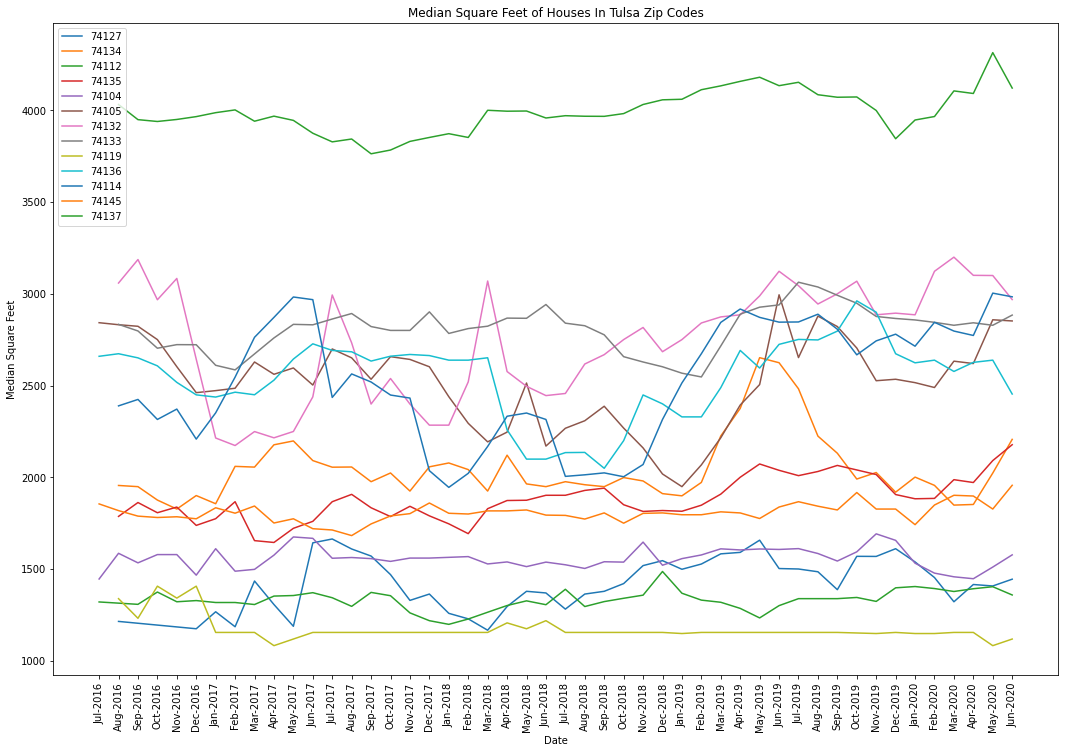

In [24]:
fig = plt.figure(figsize=[18,12])

for zipc in zipcodes:
    plt.plot(zips_dict[zipc]['date'], zips_dict[zipc]['median_square_feet'])
    

plt.xticks(rotation=90)
plt.legend(zipcodes)
plt.gca().invert_xaxis()
plt.xlabel('Date')
plt.ylabel('Median Square Feet')
plt.title('Median Square Feet of Houses In Tulsa Zip Codes')
plt.show()

Looks like the homes in 74112 are significantly larger than those in the rest of the sampled zip codes. On the other hand, those in 74119 and 74137 are the smallest.

### Next, it's time to compare the zip codes 

For the sake of user comfort, each graph will be interactive. Starting with a graph to compare between the zip codes on the variables in our dataset.

In [25]:
def f(column):
  fig = plt.figure(figsize=[18,12])
  for zipc in zipcodes:
    plt.plot(zips_dict[zipc]['date'], zips_dict[zipc][column])
  
  plt.xticks(rotation=90)
  plt.legend(zipcodes)
  plt.gca().invert_xaxis()
  plt.xlabel('Date')
  plt.title('Tulsa Zip Codes')
  plt.show()

In [26]:
%%capture
! pip install ipywidgets

In [27]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Getting a list of the variables in our dataset, excluding the static ones (those that don't change with the dates).

In [28]:
columns = list(tulsadf.columns[7:])
columns

['median_listing_price',
 'new_listing_count',
 'price_increased_count',
 'price_reduced_count',
 'median_listing_price_per_square_feet',
 'median_square_feet',
 'average_listing_price',
 'total_listing_count']

Choose a column from the drop down list and the graph will compare the zip codes on that basis.

In [29]:
interact(f, column=columns)

interactive(children=(Dropdown(description='column', options=('median_listing_price', 'new_listing_count', 'pr…

<function __main__.f>

Now, to separate the columns to those with large values and those with small values.

In [30]:
bigcols = ['median_listing_price',
 'average_listing_price']
smallcols = ['new_listing_count',
 'price_increased_count',
 'price_reduced_count',
 'median_listing_price_per_square_feet',
 'total_listing_count']

The next two graphs will provide a more visual perspective on the distribution of our variables throughout the months in our data.

In [31]:
def bigcol(zipcode):
  fig = plt.figure(figsize=[18,12])
  for col in bigcols:
    plt.plot(zips_dict[zipcode]['date'], zips_dict[zipcode][col])
  
  plt.xticks(rotation=90)
  plt.legend(bigcols)
  plt.gca().invert_xaxis()
  plt.xlabel('Date')
  plt.ylabel('Price in USD')
  plt.title('Comparing Average and Median Prices In Each of the Tulsa Zip Codes')
  plt.show()

In [32]:
def smallcol(zipcode):
  fig = plt.figure(figsize=[18,12])
  for col in smallcols:
    plt.plot(zips_dict[zipcode]['date'], zips_dict[zipcode][col])
  
  plt.xticks(rotation=90)
  plt.legend(smallcols)
  plt.gca().invert_xaxis()
  plt.xlabel('Date')
  plt.ylabel('Count or Price in USD')
  plt.title('Comparing Listing Variables In Each of the Tulsa Zip Codes')
  plt.show()

From the drop down list, pick a zip code to observe the changes in our variables.

In [33]:
interact(bigcol, zipcode=zipcodes)

interactive(children=(Dropdown(description='zipcode', options=('74127', '74134', '74112', '74135', '74104', '7…

<function __main__.bigcol>

In [34]:
interact(smallcol, zipcode=zipcodes)

interactive(children=(Dropdown(description='zipcode', options=('74127', '74134', '74112', '74135', '74104', '7…

<function __main__.smallcol>

Let's use geolocator to find the exact coordinates of Tulsa.

In [35]:
address = 'Tulsa, OK'

geolocator = Nominatim(user_agent="tulsa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Tulsa are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Tulsa are 36.1556805, -95.9929113.


Now to create a map

In [36]:
# create a plain map of Tulsa
tulsa_map = folium.Map(location=[latitude, longitude], zoom_start=11)
tulsa_map

Now to add markers to the map. Each marker will state this information (dated from 2010), in the following order: 
*   The zip code
*   The population
*   The population per square mile
*   The average household income

In [38]:
# adding markers to the map

for lat, lng, zc, pop, dense, inco in zip(cdf2['latitude'], cdf2['longitude'], cdf2['zip_code'], cdf2['population'], cdf2['people_sq_mile'], cdf2['avg_income_household'] ):
    label = '{}, {}, {}, {}'.format(zc, pop, dense, inco)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tulsa_map)  
    
tulsa_map

Let's simplify the above map and focus only on the zipcodes presented in the graphs above. First, let's create a new dataframe containing only those zip codes.

In [39]:
cdf5 = cdf2[(cdf2['zip_code'].isin(zipcodes))]
cdf5.reset_index(inplace=True, drop=True)
cdf5

,zip_code,population,people_sq_mile,avg_income_household,latitude,longitude
0,74104,14050,5138.36,29986.0,36.146447,-95.953949
1,74119,3790,4351.88,26549.0,36.141847,-95.989724
2,74136,32712,3926.86,34812.0,36.062400,-95.941457
3,74105,28455,3869.47,36837.0,36.097300,-95.962916
4,74114,16913,3672.69,47852.0,36.126943,-95.946695
5,74135,21320,3556.62,37103.0,36.096205,-95.924016
6,74112,21222,3078.60,33728.0,36.147046,-95.906335
7,74145,18020,3004.68,39276.0,36.097138,-95.890482
8,74133,37778,2714.33,50379.0,36.039272,-95.877428
9,74137,22960,2261.74,79049.0,36.019270,-95.928910


Now, to show them on the map. As a reminder, each marker will state this information (dated from 2010), in the following order: 
*   The zip code
*   The population
*   The population per square mile
*   The average household income

In [40]:
tulsa_map = folium.Map(location=[latitude, longitude], zoom_start=11)
tulsa_map

# add markers to map
for lat, lng, zc, pop, dense, inco in zip(cdf5['latitude'], cdf5['longitude'], cdf5['zip_code'], cdf5['population'], cdf5['people_sq_mile'], cdf5['avg_income_household']):
    label = '{}, {}, {}, {}'.format(zc, pop, dense, inco)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tulsa_map)  
    
tulsa_map

Now I'm going to use Foursquare API to explore each of these zip codes by their most popular vanues.

#### Defining Foursquare Credentials, Version and limit

In [41]:
CLIENT_ID = 'CLIENTID' # I hid my ID before submitting 
CLIENT_SECRET = 'CLIENTSECRET' 
VERSION = '20200725' 
LIMIT = 100

Now to use a function to get the most commonly visited venues in each of the relevant zip codes in Tulsa. Notice how the range is 2000 (meters, which is 2 kilometers or about 1.25 miles) since these are zip codes, and are spread over a wide area.

In [42]:
def getNearbyVenues(zip_codes, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(zip_codes, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now to use the above function on each of the zip codes, then to create a new dataframe "tulsa_venues".

In [43]:
tulsa_venues = getNearbyVenues(zip_codes=cdf5['zip_code'],
                                   latitudes=cdf5['latitude'],
                                   longitudes=cdf5['longitude']
                                  )



74104
74119
74136
74105
74114
74135
74112
74145
74133
74137
74134
74127
74132


#### Let's see what is the size of the new dataframe


In [44]:
print(tulsa_venues.shape)
tulsa_venues.head()

(789, 7)


,Zip Code,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,74104,36.146447,-95.953949,Starship Records & Tapes,36.144307,-95.957907,Record Shop
1,74104,36.146447,-95.953949,The Pie Hole Pizzeria,36.140449,-95.951067,Pizza Place
2,74104,36.146447,-95.953949,The Campbell Lounge,36.147657,-95.952037,Lounge
3,74104,36.146447,-95.953949,Cancun International,36.150602,-95.957930,Mexican Restaurant
4,74104,36.146447,-95.953949,Perry's Old Time Meat Market,36.148529,-95.957891,Butcher


Let's see how many venues were returned for each zip code.

In [45]:
tulsa_venues.groupby('Zip Code').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Zip Code,,,,,,
74104,100,100,100,100,100,100
74105,27,27,27,27,27,27
74112,73,73,73,73,73,73
74114,96,96,96,96,96,96
74119,100,100,100,100,100,100
74127,4,4,4,4,4,4
74132,52,52,52,52,52,52
74133,38,38,38,38,38,38
74134,3,3,3,3,3,3


#### Let's find out how many unique categories can be curated from all the returned venues

In [46]:
print('There are {} uniques categories.'.format(len(tulsa_venues['Venue Category'].unique())))

There are 163 uniques categories.


## Analyzing Each Zip Code

In [47]:
tulsa_onehot = pd.get_dummies(tulsa_venues[['Venue Category']], prefix="", prefix_sep="")

tulsa_onehot['Zip Code'] = tulsa_venues['Zip Code'] 

zip_col = tulsa_onehot['Zip Code']
tulsa_onehot.drop(labels=['Zip Code'], axis=1,inplace = True)
tulsa_onehot.insert(0, 'Zip Code', zip_col)

tulsa_onehot.head()

,Zip Code,ATM,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beer Garden,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burmese Restaurant,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,...,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,74104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,74104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,74104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,74104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,74104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [48]:
tulsa_onehot.shape

(789, 164)

#### Next, let's group rows by zip code and by taking the mean of the frequency of occurrence of each category

In [49]:
tulsa_grouped = tulsa_onehot.groupby('Zip Code').mean().reset_index()
tulsa_grouped

,Zip Code,ATM,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Beer Garden,Big Box Store,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burmese Restaurant,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,...,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,Social Club,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,74104,0.000000,0.010000,0.070000,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.010000,0.010000,0.040000,0.000000,0.010000,0.000000,0.00,0.000000,0.000000,0.00,0.010000,0.01,0.030000,0.000000,0.01,0.010000,0.000000,0.00,0.00,0.010000,0.010000,0.00,0.050000,0.000000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,...,0.01,0.000000,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.020000,0.010000,0.000000,0.00,0.000000,0.000000,0.020000,0.000000
1,74105,0.000000,0.000000,0.037037,0.00,0.000000,0.00,0.037037,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.074074,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.037037,0.000000,0.000000,0.074074,0.000000,0.000000,0.037037,0.000000,...,0.00,0.000000,0.037037,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,74112,0.000000,0.000000,0.041096,0.00,0.000000,0.00,0.000000,0.000000,0.013699,0.027397,0.000000,0.000000,0.000000,0.027397,0.000000,0.00,0.027397,0.000000,0.00,0.013699,0.00,0.027397,0.000000,0.00,0.027397,0.000000,0.00,0.00,0.041096,0.000000,0.00,0.027397,0.000000,0.000000,0.054795,0.013699,0.000000,0.000000,0.013699,...,0.00,0.000000,0.054795,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.013699,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.013699,0.000000,0.013699,0.000000,0.00,0.000000,0.000000,0.000000,0.013699,0.00,0.013699,0.000000,0.000000,0.000000,0.00,0.000000,0.013699,0.000000,0.000000
3,74114,0.000000,0.010417,0.041667,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.020833,0.010417,0.010417,0.010417,0.010417,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.041667,0.000000,0.00,0.010417,0.000000,0.00,0.00,0.020833,0.020833,0.00,0.010417,0.000000,0.000000,0.010417,0.031250,0.000000,0.000000,0.010417,...,0.00,0.000000,0.041667,0.000000,0.00,0.000000,0.000000,0.000000,0.010417,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.010417,0.000000,0.000000,0.00,0.010417,0.010417,0.000000,0.000000,0.010417,0.00,0.020833,0.010417,0.010417,0.010417,0.00,0.000000,0.031250,0.000000,0.000000,0.00,0.000000,0.000000,0.041667,0.020833
4,74119,0.000000,0.000000,0.050000,0.02,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.040000,0.000000,0.01,0.000000,0.010000,0.01,0.010000,0.02,0.020000,0.000000,0.00,0.030000,0.020000,0.00,0.01,0.000000,0.000000,0.03,0.080000,0.010000,0.

#### Let's confirm the new size

In [50]:
tulsa_grouped.shape

(13, 164)

For the next step, the zip codes in the "Zip Code" column need to be a string (object) type, so let's make sure that is the case.

In [51]:
tulsa_grouped = tulsa_grouped.astype({'Zip Code':str})
tulsa_grouped.dtypes

Zip Code                object
ATM                    float64
Accessories Store      float64
American Restaurant    float64
Art Gallery            float64
                        ...   
Weight Loss Center     float64
Wine Shop              float64
Wings Joint            float64
Women's Store          float64
Yoga Studio            float64
Length: 164, dtype: object

#### Now to print every zip code along with the top 5 most common venues

In [52]:
num_top_venues = 5

for zc in tulsa_grouped['Zip Code']:
    print("----"+zc+"----")
    temp = tulsa_grouped[tulsa_grouped['Zip Code'] == zc].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----74104----
                 venue  freq
0   Mexican Restaurant  0.10
1  American Restaurant  0.07
2          Coffee Shop  0.05
3    Convenience Store  0.04
4       Sandwich Place  0.04


----74105----
               venue  freq
0  Convenience Store  0.07
1       Burger Joint  0.07
2      Grocery Store  0.07
3        Pizza Place  0.07
4           Dive Bar  0.04


----74112----
                  venue  freq
0        Discount Store  0.05
1  Fast Food Restaurant  0.05
2     Convenience Store  0.05
3        Sandwich Place  0.05
4   Fried Chicken Joint  0.04


----74114----
                 venue  freq
0         Burger Joint  0.04
1        Women's Store  0.04
2       Sandwich Place  0.04
3             Pharmacy  0.04
4  American Restaurant  0.04


----74119----
                 venue  freq
0          Coffee Shop  0.08
1                 Park  0.06
2  American Restaurant  0.05
3   Mexican Restaurant  0.04
4                  Bar  0.04


----74127----
                  venue  freq
0  Arts & En

#### Let's put that into a pandas dataframe

Starting with writing a function to sort the venues in descending order.

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now to create the new dataframe and display the top 10 venues for each zip code.

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Zip Code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

zip_codes_venues_sorted = pd.DataFrame(columns=columns)
zip_codes_venues_sorted['Zip Code'] = tulsa_grouped['Zip Code']

for ind in np.arange(tulsa_grouped.shape[0]):
    zip_codes_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tulsa_grouped.iloc[ind, :], num_top_venues)

zip_codes_venues_sorted

,Zip Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,74104,Mexican Restaurant,American Restaurant,Coffee Shop,Bakery,Convenience Store,Sandwich Place,Pharmacy,Burger Joint,Pizza Place,Gym
1,74105,Grocery Store,Pizza Place,Convenience Store,Burger Joint,Liquor Store,Gas Station,Pharmacy,Dive Bar,Dance Studio,Sandwich Place
2,74112,Sandwich Place,Fast Food Restaurant,Discount Store,Convenience Store,Fried Chicken Joint,American Restaurant,Chinese Restaurant,Mexican Restaurant,Pizza Place,Pharmacy
3,74114,American Restaurant,Pharmacy,Sandwich Place,Women's Store,Burger Joint,Liquor Store,Furniture / Home Store,Pizza Place,Video Store,Cosmetics Shop
4,74119,Coffee Shop,Park,American Restaurant,Mexican Restaurant,Bar,Pizza Place,Steakhouse,Italian Restaurant,Cocktail Bar,Café
5,74127,Other Repair Shop,Arts & Entertainment,Food,Event Space,Yoga Studio,Food Truck,Food Service,Food Court,Food & Drink Shop,Flower Shop
6,74132,Mexican Restaurant,Burger Joint,Pizza Place,Pet Store,Intersection,Coffee Shop,Furniture / Home Store,Clothing Store,Video Game Store,Mattress Store
7,74133,American Restaurant,Convenience Store,Hotel,Ice Cream Shop,Pizza Place,Fast Food Restaurant,Park,Department Store,Sporting Goods Shop,Burger Joint
8,74134,Food,Convenience Store,Fast Food Restaurant,Yoga Studio,Farm,Food Service,Food Court,Food & Drink Shop,Flower Shop,Farmers Market
9,74135,Mexican Restaurant,Clothing Store,Pizza Place,Fast Food Restaurant,Coffee Shop,Sandwich Place,Shoe Store,Cosmetics Shop,Bakery,Seafood Restaurant


The table above shows the most freaquented venues in each zip code. This information can assist the development company to decide on how to allocate funds for investment and development. To best match the habits of the population, based on their characteristics, with their available options for construction. 

### That's it! Thank you for reviewing this notebook!